### **The steps are as followed:**

**1.Explore the Example Data of Cats and Dogs**

**2.Build and Train a Neural Network to recognize the difference between the two**

**3.Evaluate the Training and Validation accuracy**

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-06-23 23:57:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
正在解析主机 storage.googleapis.com (storage.googleapis.com)... 34.64.4.16
正在连接 storage.googleapis.com (storage.googleapis.com)|34.64.4.16|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：68606236 (65M) [application/zip]
正在保存至: “/tmp/cats_and_dogs_filtered.zip”

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   304KB/s  用时 7m 36s    

2020-06-24 00:04:56 (147 KB/s) - 已保存 “/tmp/cats_and_dogs_filtered.zip” [68606236/68606236])



In [3]:
import os 
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'

zip_ref=zipfile.ZipFile(local_zip,'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir='/tmp/cats_and_dogs_filtered'

train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [21]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


In [22]:
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

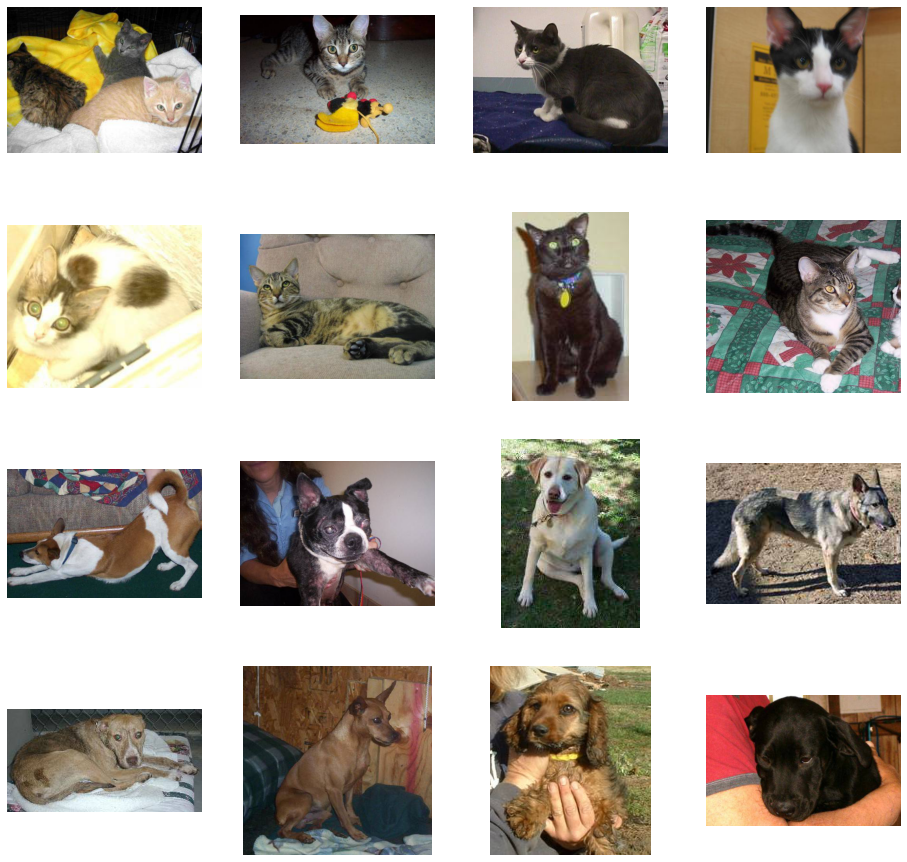

In [46]:
fig=plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix=[os.path.join(train_cats_dir,fname)
              for fname in train_cat_fnames[pic_index-8:pic_index]
             ]
next_dog_pic=[os.path.join(train_dogs_dir,fname)
              for fname in train_dog_fnames[pic_index-8:pic_index]
             ]

for i,img_path in enumerate(next_cat_pix+next_dog_pic):    
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    
    img=mpimg.imread(img_path)
    plt.imshow(img)

In [47]:
import tensorflow as tf

In [48]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [51]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All iamges will be rescaled by 1./255
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [57]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 23s - loss: 0.6677 - accuracy: 0.6185 - val_loss: 1.2725 - val_accuracy: 0.5040
Epoch 2/15
100/100 - 25s - loss: 0.5946 - accuracy: 0.6825 - val_loss: 0.5743 - val_accuracy: 0.7160
Epoch 3/15
100/100 - 29s - loss: 0.5195 - accuracy: 0.7435 - val_loss: 0.6005 - val_accuracy: 0.6720
Epoch 4/15
100/100 - 29s - loss: 0.4461 - accuracy: 0.7815 - val_loss: 0.6265 - val_accuracy: 0.7200
Epoch 5/15
100/100 - 30s - loss: 0.3705 - accuracy: 0.8455 - val_loss: 0.6018 - val_accuracy: 0.7040
Epoch 6/15
100/100 - 29s - loss: 0.2883 - accuracy: 0.8825 - val_loss: 0.6868 - val_accuracy: 0.6970
Epoch 7/15
100/100 - 34s - loss: 0.2158 - accuracy: 0.9155 - val_loss: 0.9018 - val_accuracy: 0.6920
Epoch 8/15
100/100 - 32s - loss: 0.1562 - accuracy: 0.9380 - val_loss: 0.9594 - val_accuracy: 0.6810
Epoch 9/15
100/100 - 25s - loss: 0.1111 - accuracy: 0.9605 - val_loss: 1.1880 - val_accuracy: 0.699

In [59]:
import numpy as np
from tensorflow.keras.preprocessing import image

path='./CatsOrDogs/dog1.jpg'

def CatsOrDogs(path):
    fn=path.split('/')[-1]
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")
    
CatsOrDogs(path)

[1.]
dog1.jpg is a dog


Text(0.5, 1.0, 'Training and validation loss')

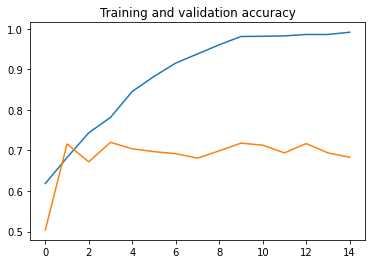

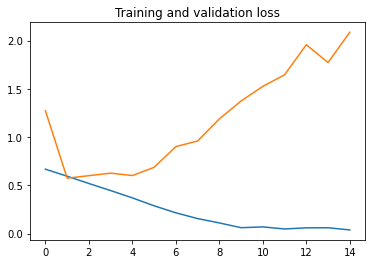

In [60]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )